In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

c:\users\tea\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Tour de France v zadnjih 5 letih

In [6]:
r2012 = pd.read_csv('Tour-rumena-majica\\2012_0.csv')
r2013 = pd.read_csv('Tour-rumena-majica\\2013_0.csv')
r2014 = pd.read_csv('Tour-rumena-majica\\2014_0.csv')
r2015 = pd.read_csv('Tour-rumena-majica\\2015_0.csv')
r2016 = pd.read_csv('Tour-rumena-majica\\2016_0.csv')
st = pd.read_csv('Starosti\\St2012.csv')
st = pd.read_csv('Starosti\\St2013.csv')
st = pd.read_csv('Starosti\\St2014.csv')
st = pd.read_csv('Starosti\\St2015.csv')
st = pd.read_csv('Starosti\\St2016.csv')

In [8]:
rs2 = r2012.merge(st, on='ime_tekmovalca')
rs3 = r2013.merge(st, on='ime_tekmovalca')
rs4 = r2014.merge(st, on='ime_tekmovalca')
rs5 = r2015.merge(st, on='ime_tekmovalca')
rs6 = r2016.merge(st, on='ime_tekmovalca')

OPOMBE:

a) Določene ekipe so se v preteklih 5 letih večkrat preimenovale
(npr. "Saxo Bank–Tinkoff Bank" ~> "Saxo-Tinkoff" ~> "Tinkoff-Saxo" ~> "Tinkoff")
in sočasno spremenile sestavo(ali pa tudi ne). Da bi se izognila 
zapletom (v kolikšni meri je "nova" ekipa lahko smatrana kot 
ekvivalentna "stari"), obravnavam vse ekipe z različnim imenom
kot samostojne (tj. v zgornjem primeru imamo 4 različne ekipe).

## 1) Končni nosilci rumene majice in zasledovalci 

*Nosilec rumene majice (oz. zmagovalec Toura) je zmagovalec v skupnem seštevku časov vseh etap.*

### Najuspešnejša država/ekipa skozi leta po končni razvrstitvi

V tem razdelku se seveda pojavi problem iz prve opombe. Nekatere ekipe so namreč
prisotne vsa leta, nekatere le eno... Enako je pravzaprav z državami, saj v nasprotju
s "kolesarskimi velesilami" udeležba ostalih ni tako samoumevna.
Poleg tega se pri Touru večkrat govori o ekipah kot o državah, iz katerih prihajajo 
tekmovalci.
Karkorkoli že, za najuspešnejšo štejem tisto ekipo, ki prednjači po vseh kriterijih,
torej tudi po tem, koliko let je sodelovala (pod istim imenom in ne glede na zasedbo).

In [23]:
vse = pd.concat([r2012, r2013, r2014, r2015, r2016])
naj50 = pd.concat([r2012[:50], r2013[:50], r2014[:50], r2015[:50], r2016[:50]])
naj10 = pd.concat([r2012[:10], r2013[:10], r2014[:10], r2015[:10], r2016[:10]])
drzave50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'država']]
ekipe50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'ekipa']]

drzave10 = drzave50[drzave50.mesto <= 10]
ekipe10 = ekipe50[ekipe50.mesto <= 10]

najdrzave = drzave10[drzave10.mesto == 1].set_index('leto')
najekipe = ekipe10[drzave10.mesto == 1].set_index('leto')

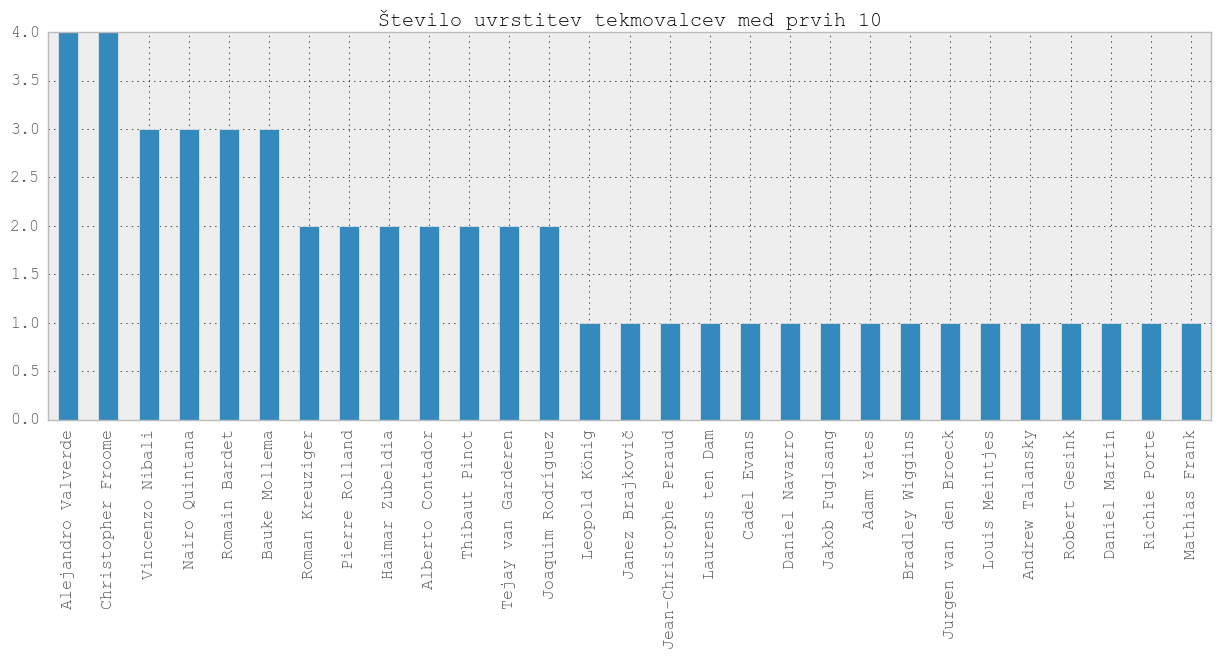

In [6]:
naj10['ime_tekmovalca'].value_counts().plot(kind='bar', fontsize='12',
                                            title='Število uvrstitev tekmovalcev med prvih 10')

In [4]:
najdrzave

,mesto,ime_tekmovalca,država
leto,,,
2012,1,Bradley Wiggins,Velika Britanija
2013,1,Christopher Froome,Velika Britanija
2014,1,Vincenzo Nibali,Italija
2015,1,Christopher Froome,Velika Britanija
2016,1,Christopher Froome,Velika Britanija


In [5]:
najekipe

,mesto,ime_tekmovalca,ekipa
leto,,,
2012,1,Bradley Wiggins,Team Sky
2013,1,Christopher Froome,Team Sky
2014,1,Vincenzo Nibali,Astana
2015,1,Christopher Froome,Team Sky
2016,1,Christopher Froome,Team Sky


### Zastopanost držav med prvimi 10/50/ oz. vsemi uvrščenimi 

,država
Španija,11
Francija,8
Velika Britanija,6
Nizozemska,5
ZDA,3


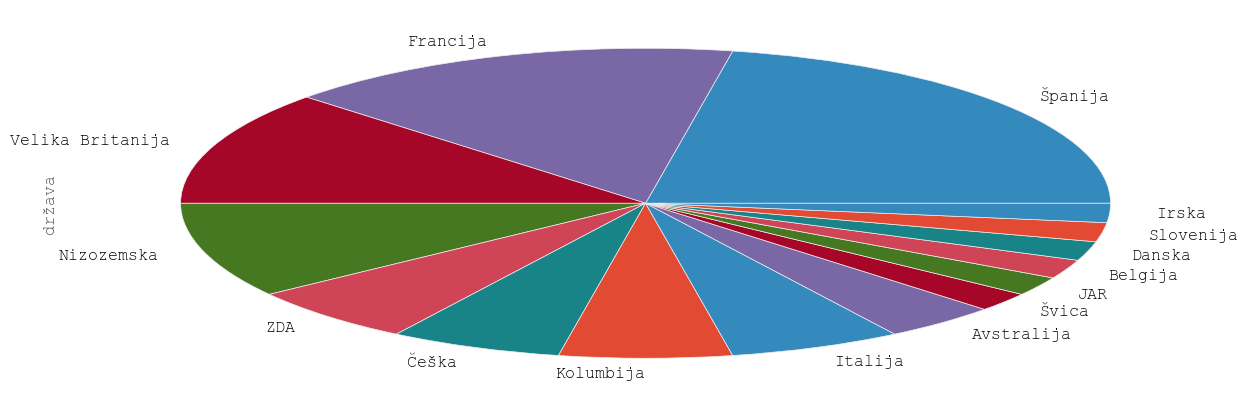

In [7]:
drzave10['država'].value_counts().plot(kind='pie', fontsize='12')
pd.DataFrame(drzave10['država'].value_counts())[:5]

,država
Francija,47
Španija,38
Nizozemska,20
Belgija,16
Italija,15


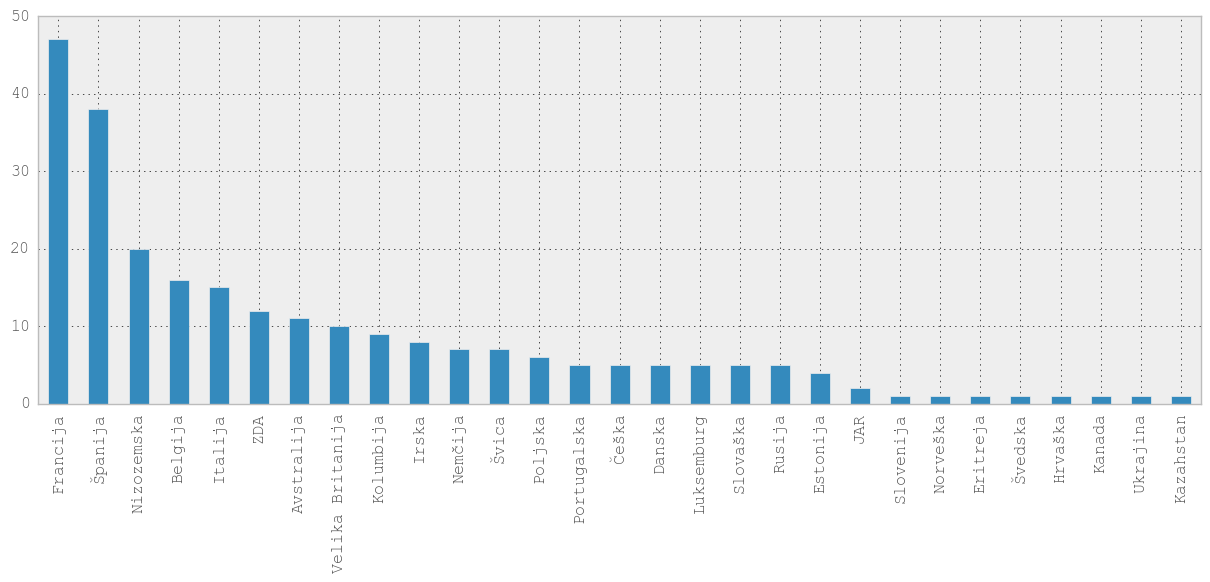

In [11]:
drzave50['država'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(drzave50['država'].value_counts())[:5]

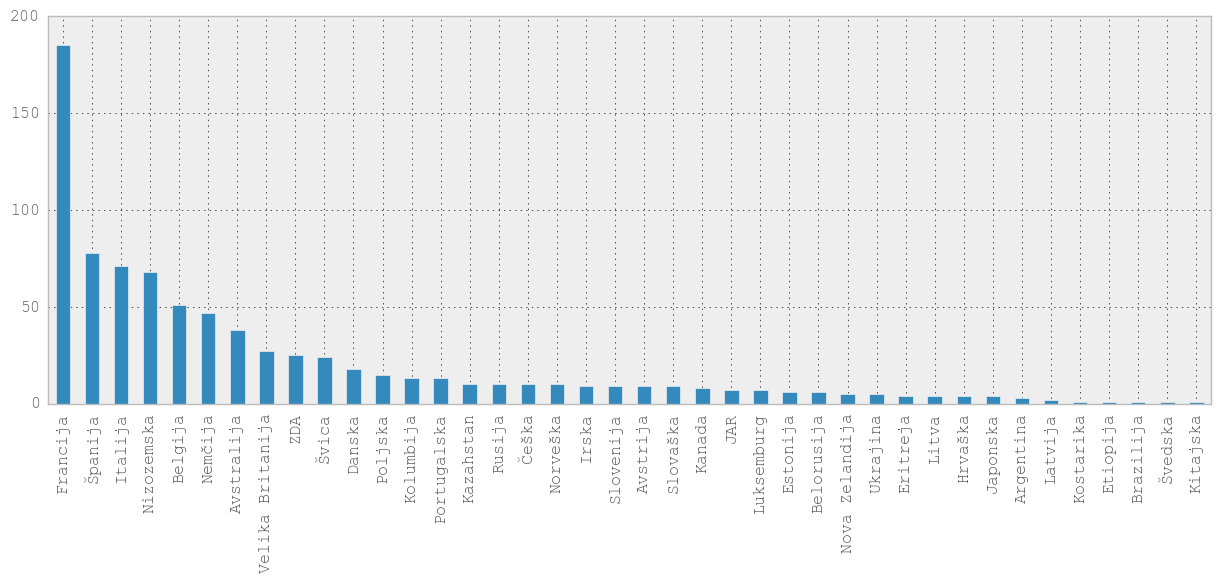

In [24]:
vse['država'].value_counts().plot(kind='bar', fontsize='12')

### Zastopanost ekip med prvimi 10/50 oz. vsemi uvrščenimi 

,ekipa
Movistar Team,7
Team Sky,5
Astana,4
AG2R La Mondiale,4
BMC Racing Team,4


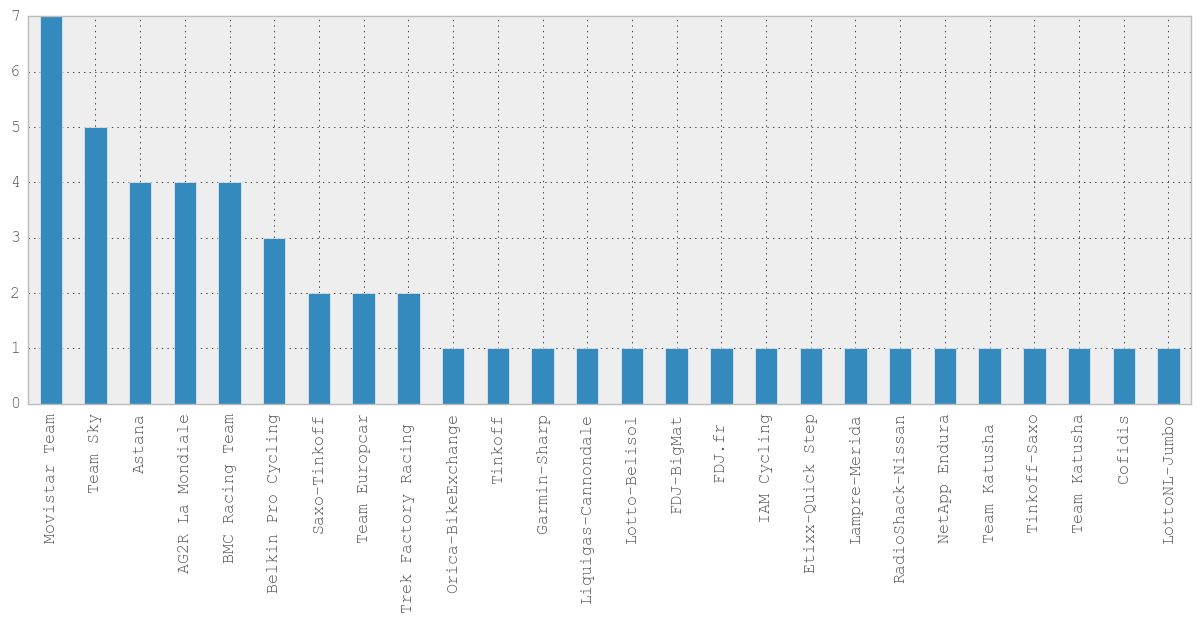

In [14]:
ekipe10['ekipa'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(ekipe10['ekipa'].value_counts())[:5]

,ekipa
BMC Racing Team,21
Team Sky,20
Movistar Team,19
Astana,18
AG2R La Mondiale,17


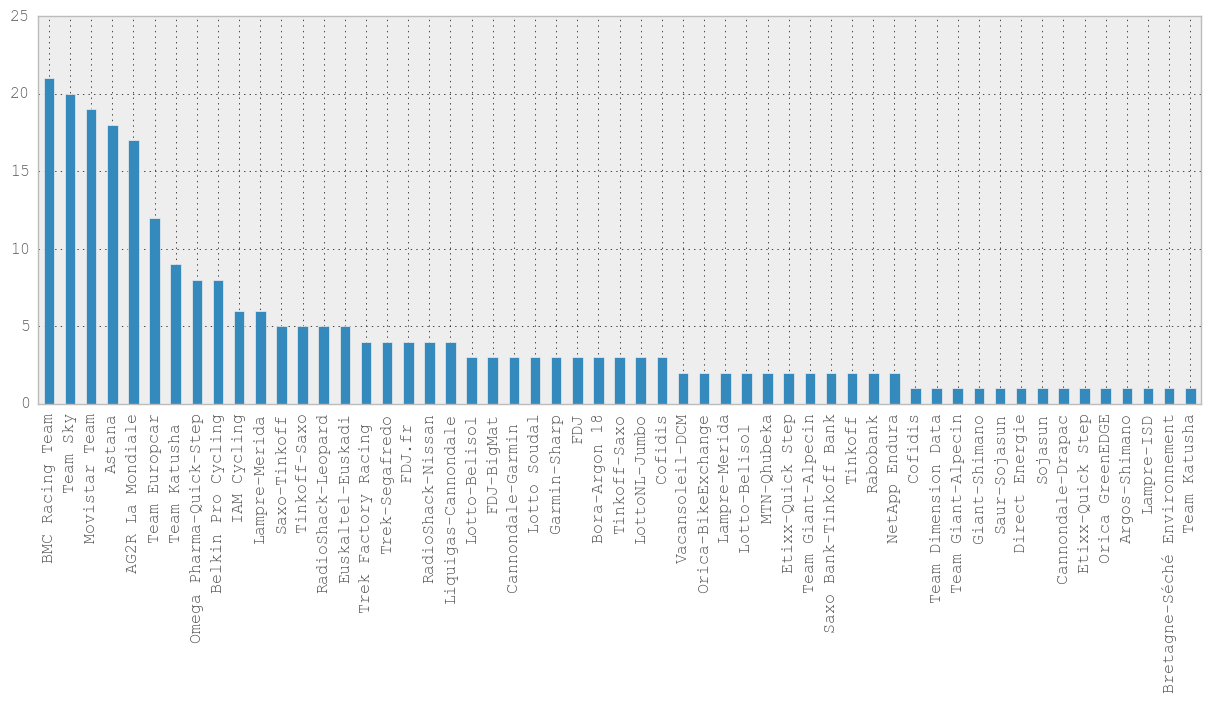

In [15]:
ekipe50['ekipa'].value_counts().plot(kind='bar', fontsize='12')
pd.DataFrame(ekipe50['ekipa'].value_counts())[:5]

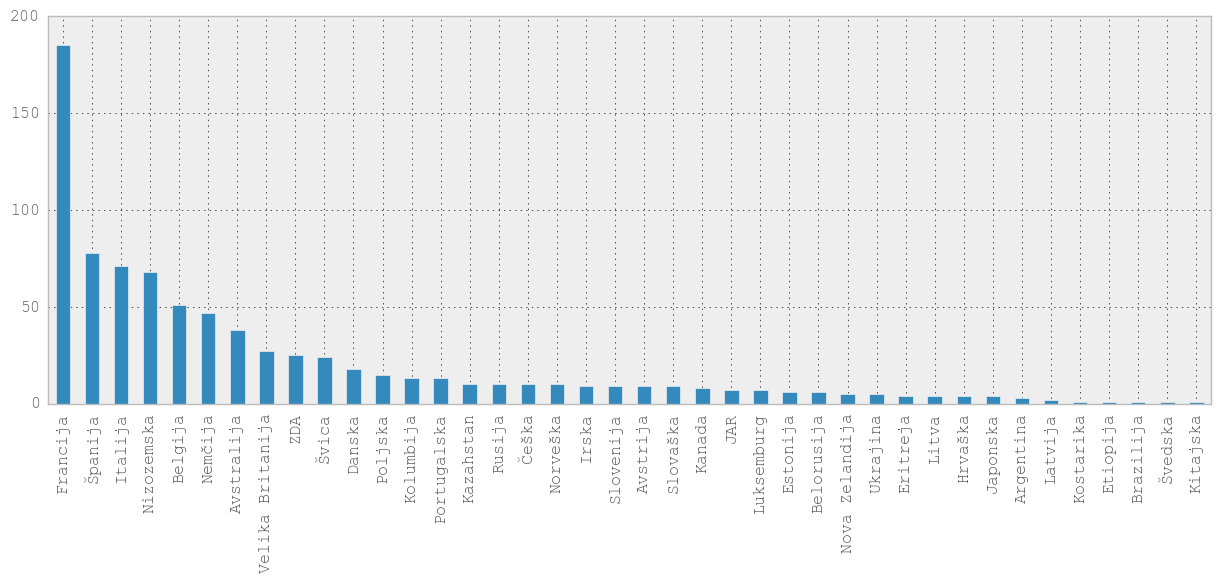

In [25]:
vse['država'].value_counts().plot(kind='bar', fontsize='12')

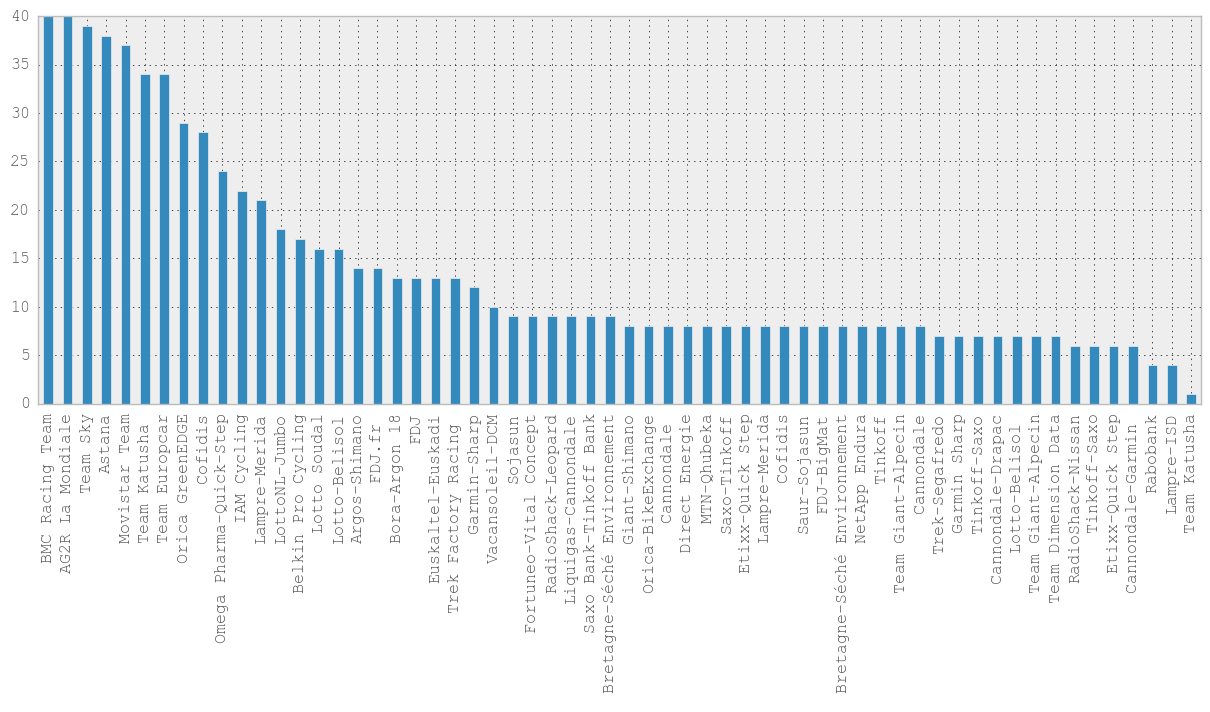

In [19]:
vse['ekipa'].value_counts().plot(kind='bar', fontsize='12')

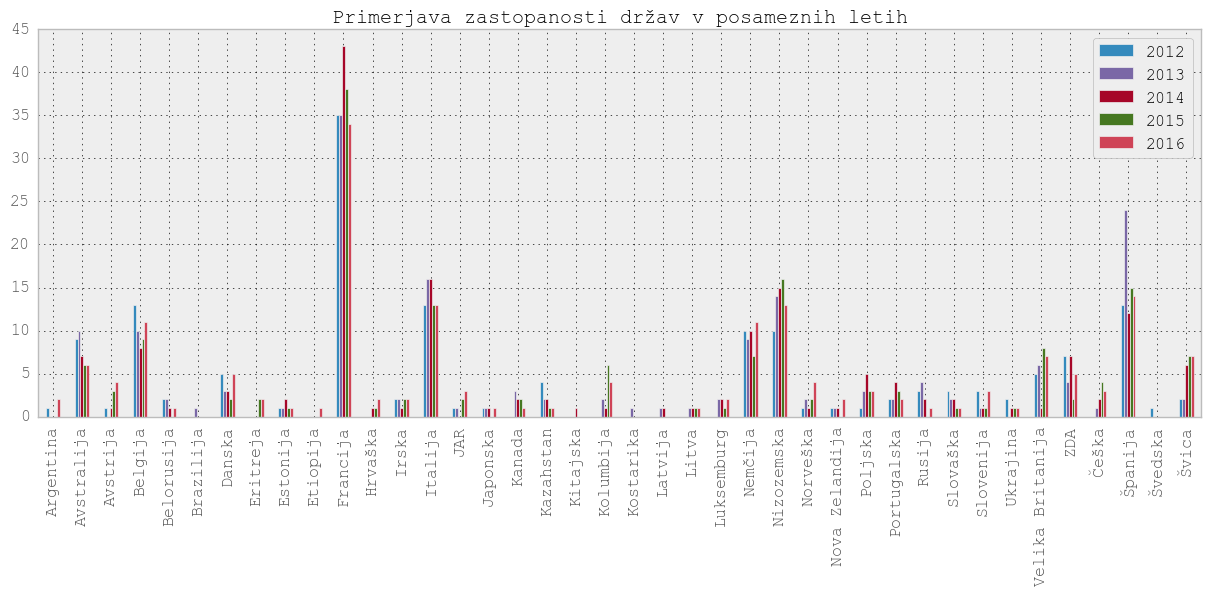

In [26]:
r2 = pd.DataFrame(r2012['država'].value_counts())
r2.columns = ['2012']
r3 = pd.DataFrame(r2013['država'].value_counts())
r3.columns = ['2013']
r4 = pd.DataFrame(r2014['država'].value_counts())
r4.columns = ['2014']
r5 = pd.DataFrame(r2015['država'].value_counts())
r5.columns = ['2015']
r6 = pd.DataFrame(r2016['država'].value_counts())
r6.columns = ['2016']
R0 = pd.concat([r2, r3, r4, r5, r6], axis = 1).plot(kind='bar', fontsize='12',
                                                   title='Primerjava zastopanosti držav v posameznih letih')

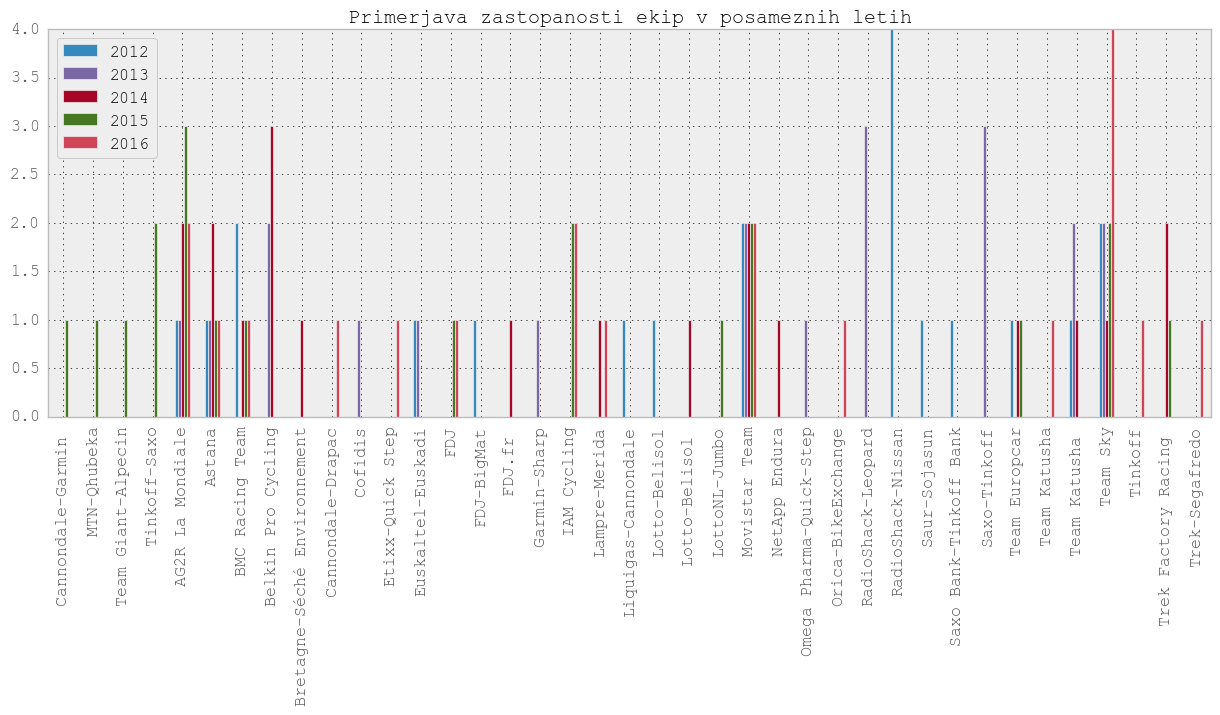

In [21]:
ru2 = pd.DataFrame(r2012[:20]['ekipa'].value_counts())
ru2.columns = ['2012']
ru3 = pd.DataFrame(r2013[:20]['ekipa'].value_counts())
ru3.columns = ['2013']
ru4 = pd.DataFrame(r2014[:20]['ekipa'].value_counts())
ru4.columns = ['2014']
ru5 = pd.DataFrame(r2015[:20]['ekipa'].value_counts())
ru5.columns = ['2015']
ru6 = pd.DataFrame(r2016[:20]['ekipa'].value_counts())
ru6.columns = ['2016']
R1 = pd.concat([ru2, ru3, ru4, ru5, ru6], axis = 1).plot(kind='bar', fontsize='12',
                                                        title='Primerjava zastopanosti ekip v posameznih letih')

### Časovni naskoki zmagovalcev

In [6]:
S = naj50[['leto', 'mesto', 'ime_tekmovalca', 'čas']]
najdva = S[S.mesto <= 2].set_index('leto')
naskok = S[S.mesto == 2][['leto', 'čas']].set_index('leto')

najdva

,mesto,ime_tekmovalca,čas
leto,,,
2012,1,Bradley Wiggins,87:34:47
2012,2,Christopher Froome,3:21
2013,1,Christopher Froome,83:56:40
2013,2,Nairo Quintana,4:20
2014,1,Vincenzo Nibali,89:59:06
2014,2,Jean-Christophe Peraud,7:37
2015,1,Christopher Froome,84:46:14
2015,2,Nairo Quintana,1:12
2016,1,Christopher Froome,89:04:48


In [13]:
max_naskok = naskok.sort_values('čas', ascending=False)
max_naskok.columns = ['zaostanek']
max_naskok

,zaostanek
leto,
2014,7:37
2013,4:20
2016,4:05
2012,3:21
2015,1:12


### Slovenci vs. Francozi 

## 2) Statistika etapnih zmag in profili etap

In [35]:
e2012 = pd.read_csv('Etape\\Tour2012.csv')
e2013 = pd.read_csv('Etape\\Tour2013.csv')
e2014 = pd.read_csv('Etape\\Tour2014.csv')
e2015 = pd.read_csv('Etape\\Tour2015.csv')
e2016 = pd.read_csv('Etape\\Tour2016.csv')

### Profili etap - (povprečne) dolžine in frekvenca vrst 

In [75]:
E = pd.concat([e2012, e2013, e2014, e2015, e2016])
et = E[['leto', 'št_etape', 'vrsta_etape', 'dolžina_etape', 'ime_tekmovalca']]

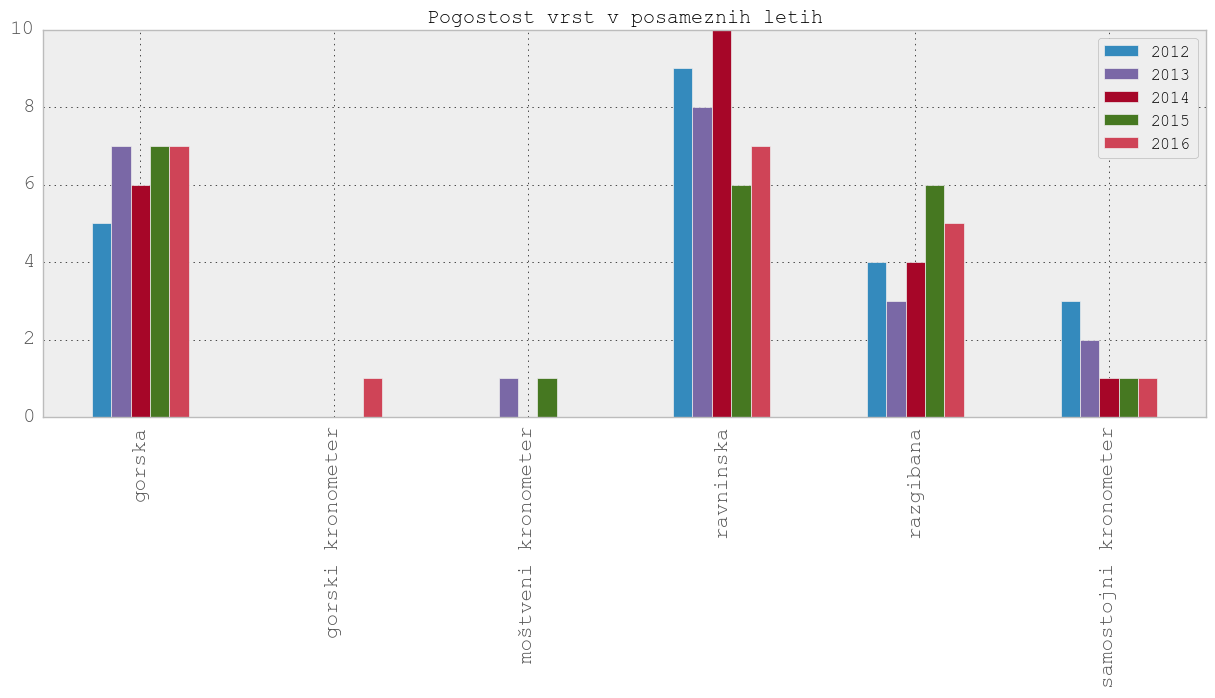

In [30]:
e2 = pd.DataFrame(e2012['vrsta_etape'].value_counts())
e2.columns = ['2012']
e3 = pd.DataFrame(e2013['vrsta_etape'].value_counts())
e3.columns = ['2013']
e4 = pd.DataFrame(e2014['vrsta_etape'].value_counts())
e4.columns = ['2014']
e5 = pd.DataFrame(e2015['vrsta_etape'].value_counts())
e5.columns = ['2015']
e6 = pd.DataFrame(e2016['vrsta_etape'].value_counts())
e6.columns = ['2016']
E0 = pd.concat([e2, e3, e4, e5, e6], axis=1)
E0.plot(kind='bar', title='Pogostost vrst v posameznih letih', fontsize='15')

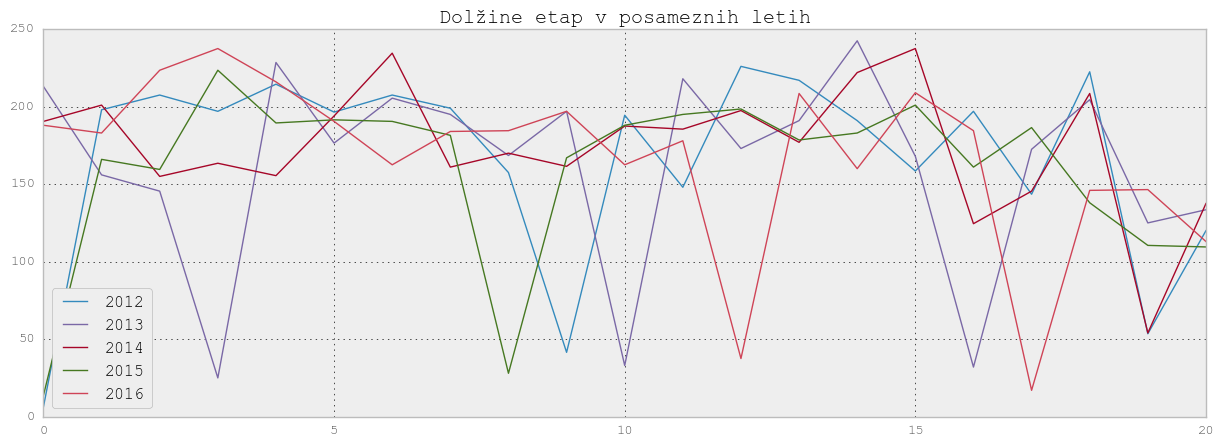

In [106]:
d2 = pd.DataFrame(e2012['dolžina_etape'])
d2.columns = ['2012']
d3 = pd.DataFrame(e2013['dolžina_etape'])
d3.columns = ['2013']
d4 = pd.DataFrame(e2014['dolžina_etape'])
d4.columns = ['2014']
d5 = pd.DataFrame(e2015['dolžina_etape'])
d5.columns = ['2015']
d6 = pd.DataFrame(e2016['dolžina_etape'])
d6.columns = ['2016']
D0 = pd.concat([d2, d3, d4, d5, d6], axis=1)
D0.plot(title='Dolžine etap v posameznih letih')


In [74]:
gore = E[et.vrsta_etape == 'gorska'].groupby('vrsta_etape').mean()['dolžina_etape']
ravnine = E[et.vrsta_etape == 'ravninska'].groupby('vrsta_etape').mean()['dolžina_etape']
razgib = E[et.vrsta_etape == 'razgibana'].groupby('vrsta_etape').mean()['dolžina_etape']
krono = E[et.vrsta_etape == 'samostojni kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
gorkro = E[et.vrsta_etape == 'gorski kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
povpr = pd.DataFrame(pd.concat([gore, ravnine, razgib, krono, gorkro]).round(2))
povpr.columns = ['povprečna dolžina etape']
povpr

,povprečna dolžina etape
vrsta_etape,
gorska,172.59
ravninska,188.19
razgibana,184.59
samostojni kronometer,33.96
gorski kronometer,17.00


In [31]:
po = et.groupby('leto', as_index=False).mean()[['leto', 'dolžina_etape']]
po.columns = ['leto', 'povprečje dolžin etap']
po0 = po.sort_values('povprečje dolžin etap', ascending=False).set_index('leto')
po0.round(2)

,povprečje dolžin etap
leto,
2014,174.45
2016,168.05
2012,166.52
2013,162.07
2015,160.01


### Najuspešnejša država/ekipa po št. etapnih zmag 

In [37]:
Edrzave = E[['leto', 'št_etape', 'ime_tekmovalca', 'država']]
Eekipe = E[['leto', 'št_etape', 'ime_tekmovalca', 'ekipa']]

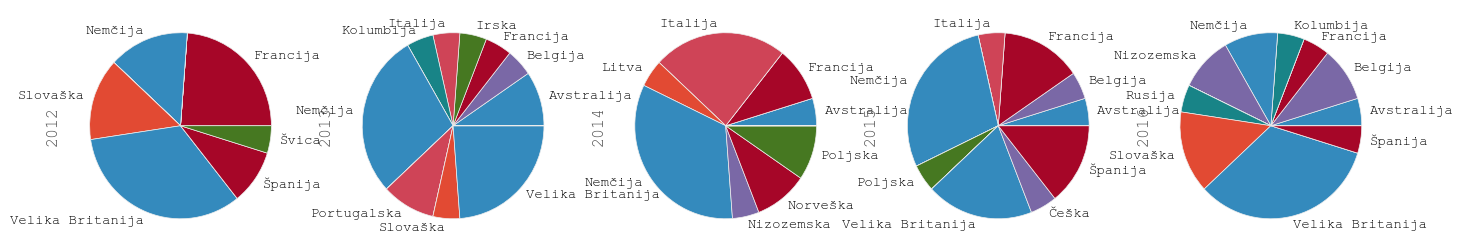

In [33]:
ed2 = pd.DataFrame(e2012['država'].value_counts())
ed2.columns = ['2012']
ed3 = pd.DataFrame(e2013['država'].value_counts())
ed3.columns = ['2013']
ed4 = pd.DataFrame(e2014['država'].value_counts())
ed4.columns = ['2014']
ed5 = pd.DataFrame(e2015['država'].value_counts())
ed5.columns = ['2015']
ed6 = pd.DataFrame(e2016['država'].value_counts())
ed6.columns = ['2016']
ED = pd.concat([ed2, ed3, ed4, ed5, ed6], axis=1).plot(kind='pie', fontsize='10',
                                                       subplots=True, 
                                                       legend=False, 
                                                       figsize=(17, 3))

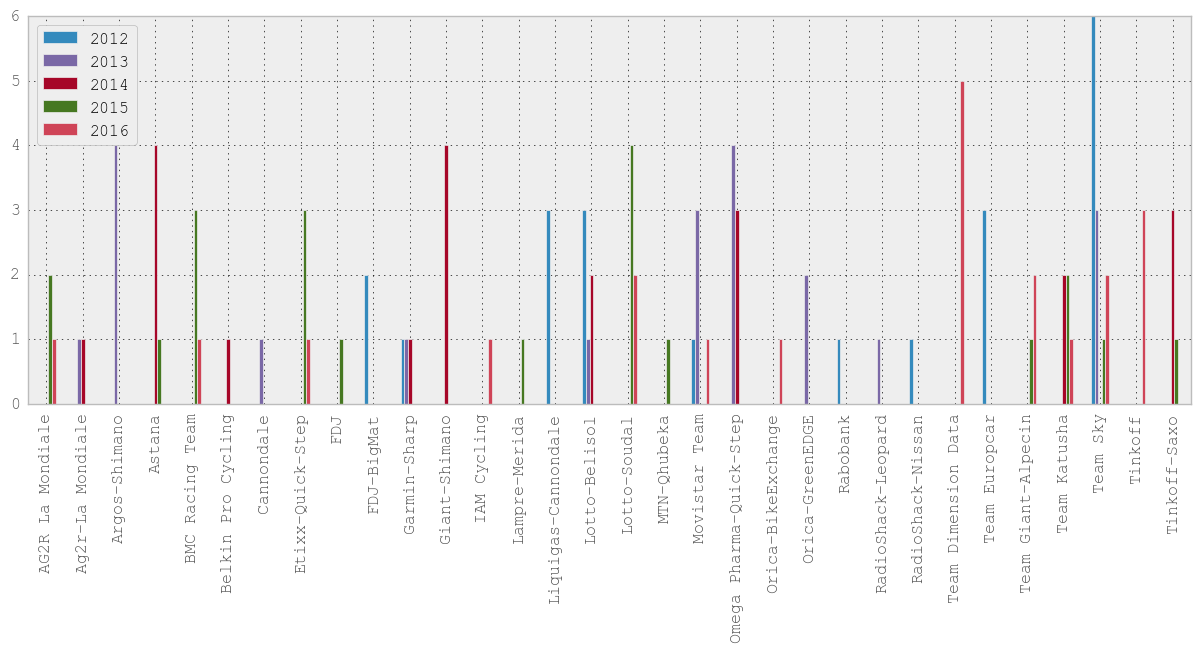

In [38]:
ee2 = pd.DataFrame(e2012['ekipa'].value_counts())
ee2.columns = ['2012']
ee3 = pd.DataFrame(e2013['ekipa'].value_counts())
ee3.columns = ['2013']
ee4 = pd.DataFrame(e2014['ekipa'].value_counts())
ee4.columns = ['2014']
ee5 = pd.DataFrame(e2015['ekipa'].value_counts())
ee5.columns = ['2015']
ee6 = pd.DataFrame(e2016['ekipa'].value_counts())
ee6.columns = ['2016']
EE = pd.concat([ee2, ee3, ee4, ee5, ee6], axis=1).plot(kind='bar', fontsize='12')

### Uspešnost držav/ekip v različnih vrstah etap

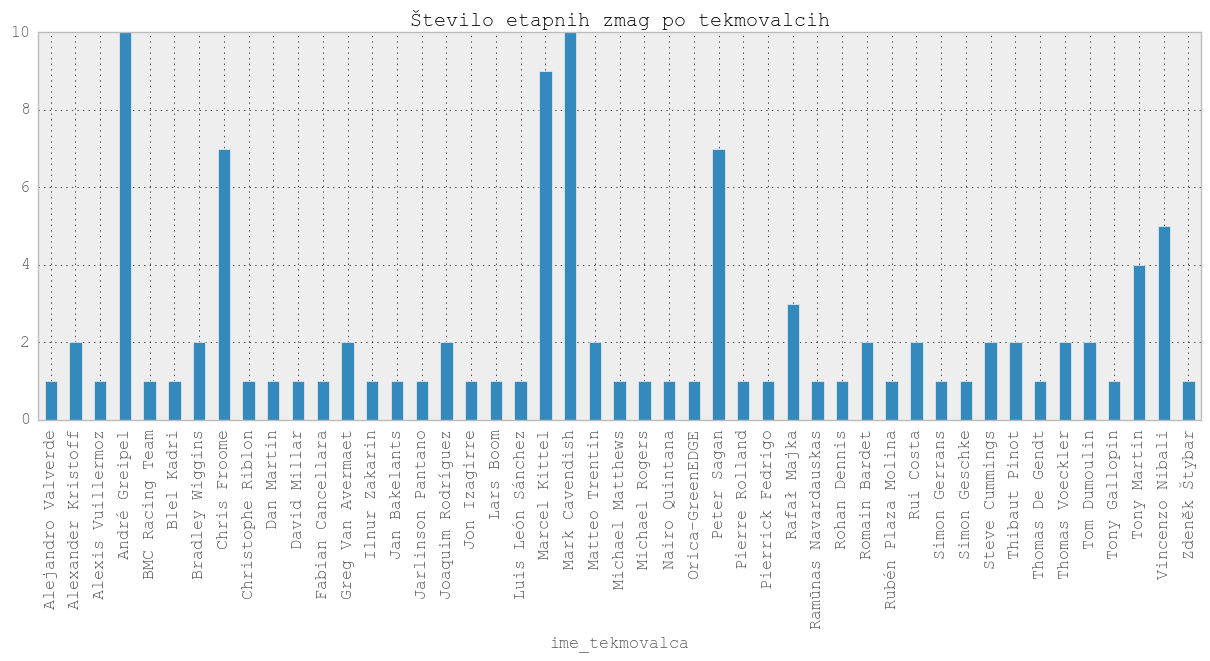

In [39]:
edrzave = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'država']]
eekipe = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'ekipa']]
etekm = E.groupby('ime_tekmovalca').size()
etekm.plot(kind='bar', title='Število etapnih zmag po tekmovalcih', fontsize='12')

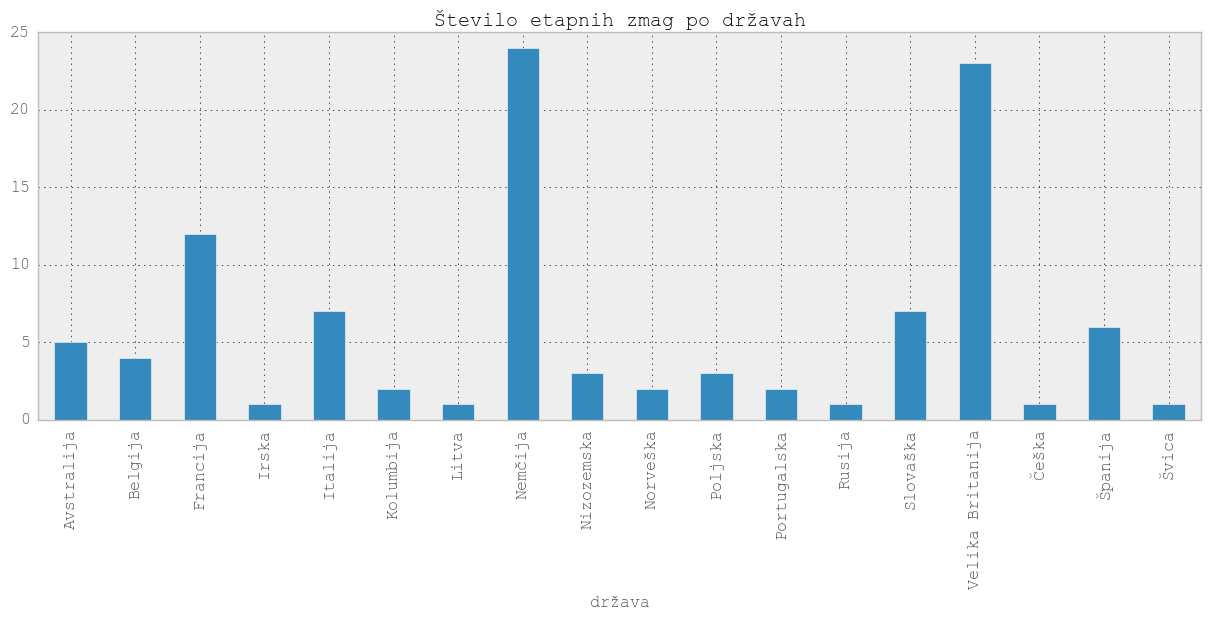

In [40]:
edrzave.groupby('država').size().plot(kind='bar', title='Število etapnih zmag po državah', fontsize='12')

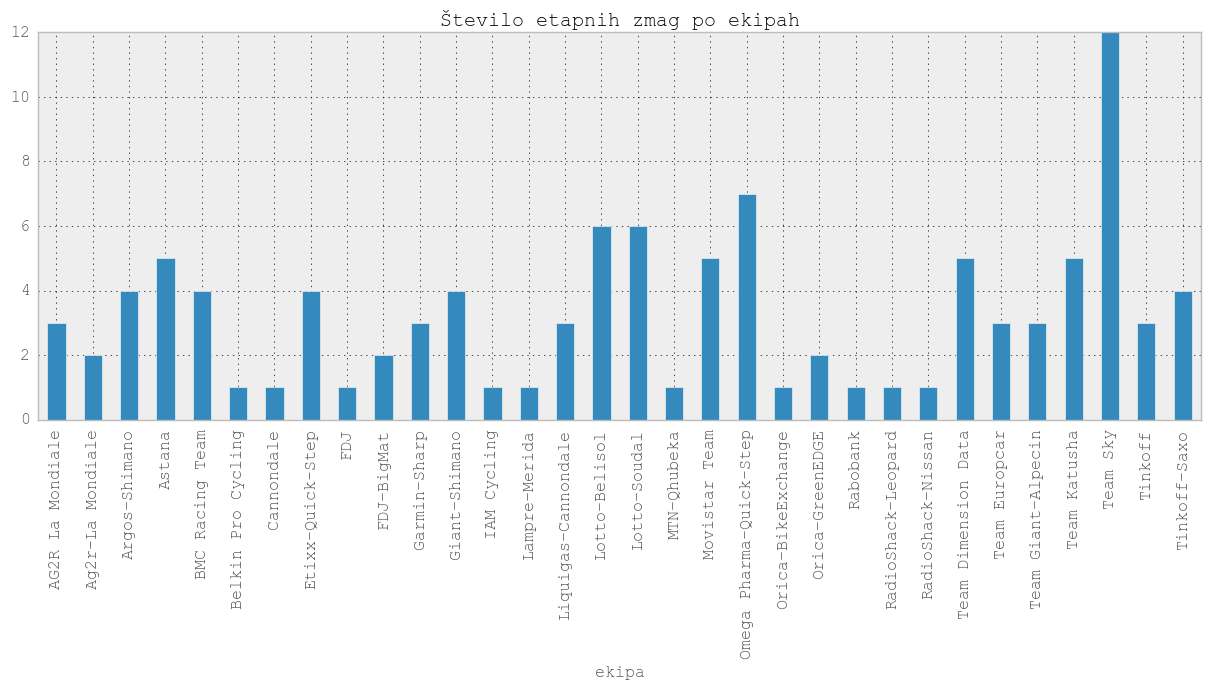

In [41]:
eekipe.groupby('ekipa').size().plot(kind='bar', title='Število etapnih zmag po ekipah', fontsize='12')

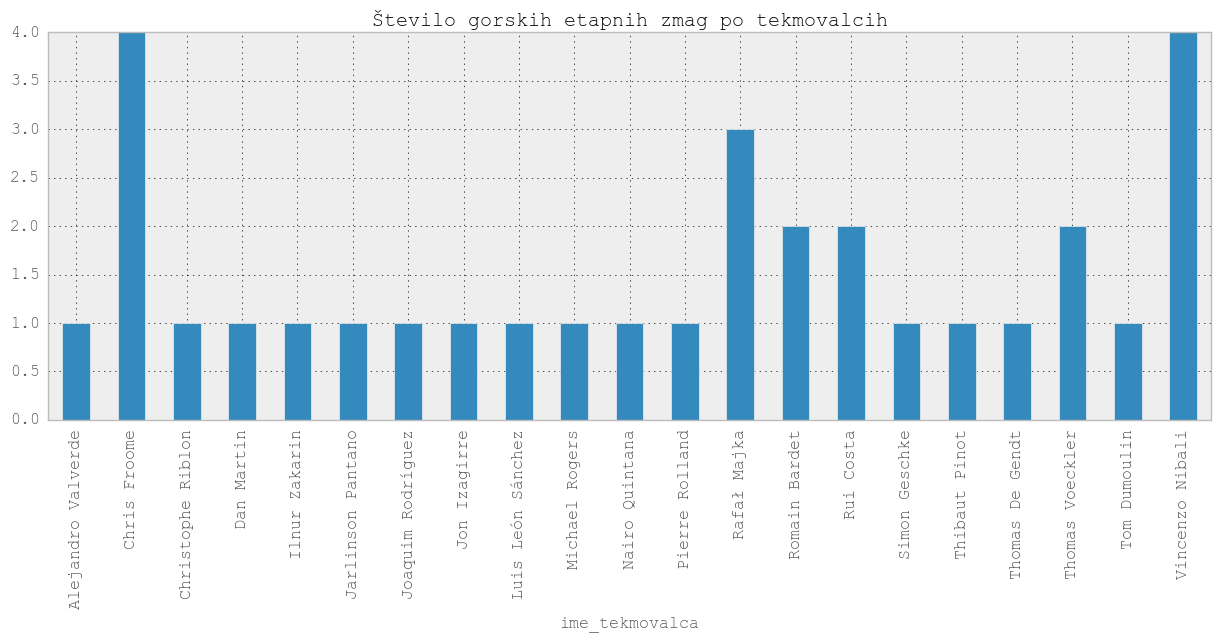

In [73]:
E[et.vrsta_etape == 'gorska'].groupby('ime_tekmovalca').size().plot(kind='bar', fontsize='12',
                                          title='Število gorskih etapnih zmag po tekmovalcih')

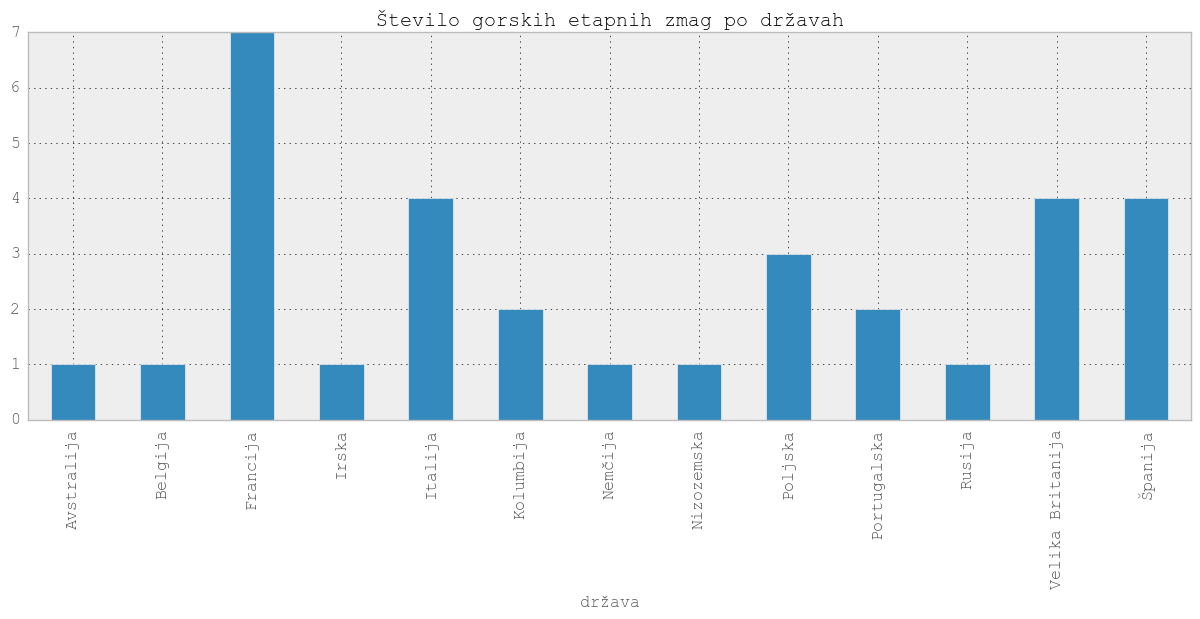

In [67]:
E[et.vrsta_etape == 'gorska'].groupby('država').size().plot(kind='bar', fontsize='12',
                                  title='Število gorskih etapnih zmag po državah')

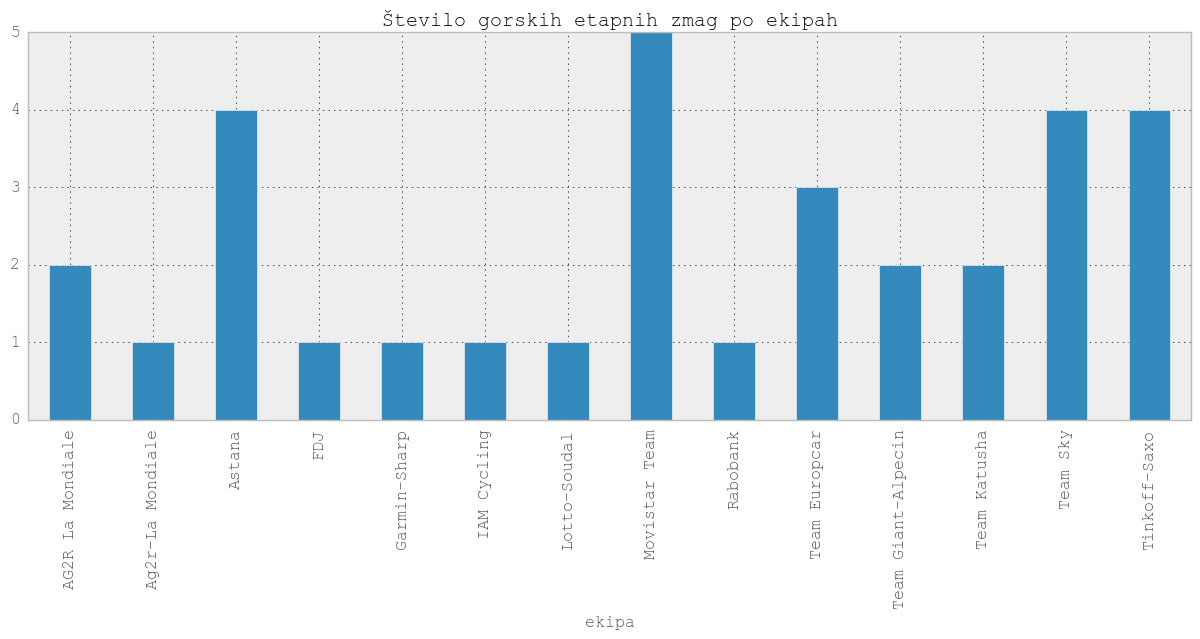

In [68]:
E[et.vrsta_etape == 'gorska'].groupby('ekipa').size().plot(kind='bar', fontsize='12',
                                 title='Število gorskih etapnih zmag po ekipah')

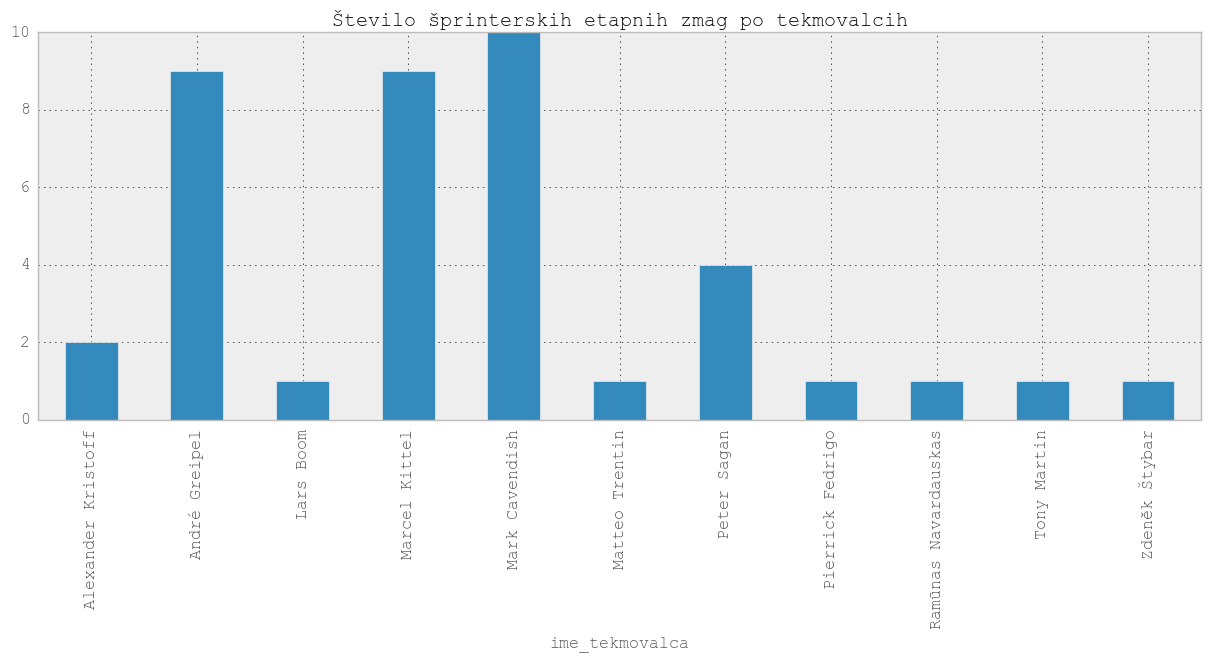

In [71]:
E[et.vrsta_etape == 'ravninska'].groupby('ime_tekmovalca').size().plot(kind='bar', fontsize='12',
                                          title='Število šprinterskih etapnih zmag po tekmovalcih')

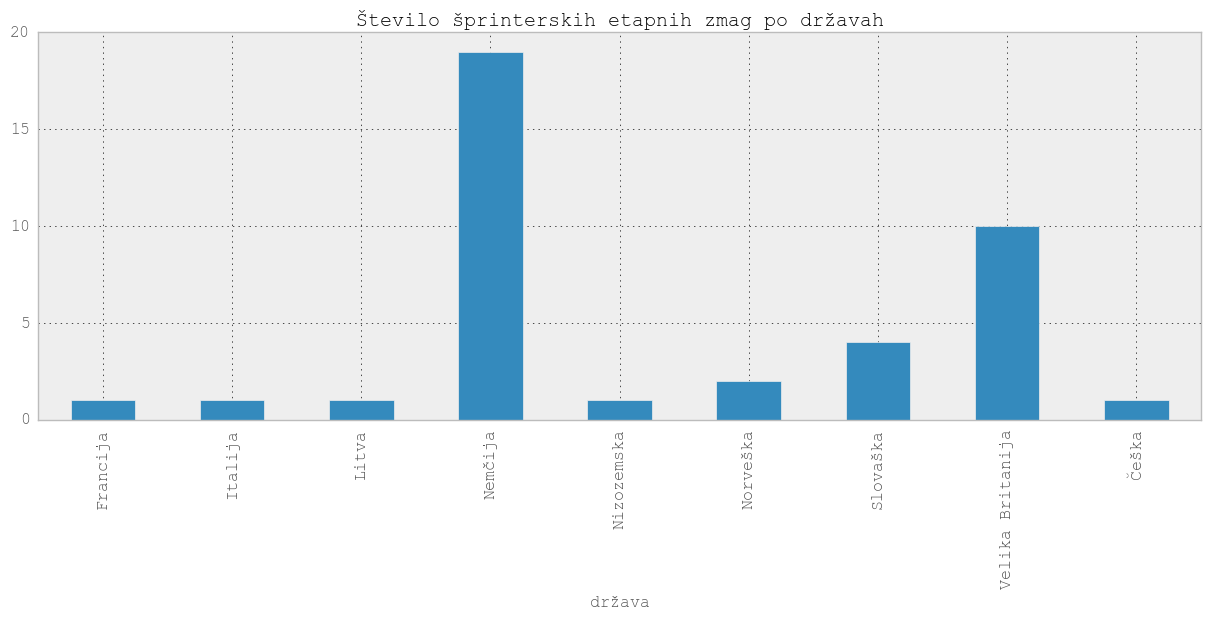

In [69]:
E[et.vrsta_etape == 'ravninska'].groupby('država').size().plot(kind='bar', fontsize='12',
                                 title='Število šprinterskih etapnih zmag po državah')

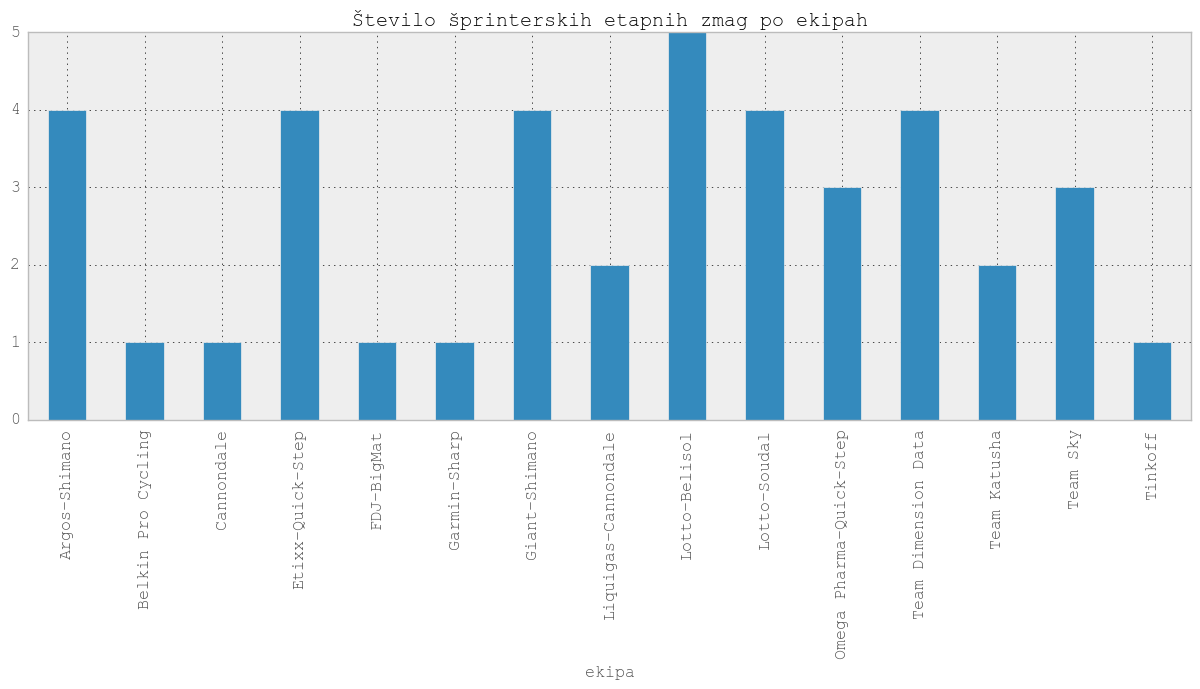

In [70]:
E[et.vrsta_etape == 'ravninska'].groupby('ekipa').size().plot(kind='bar', fontsize='12',
                                 title='Število šprinterskih etapnih zmag po ekipah')

## 3) Zelena, bela, pikčasta majica, ekipna uvrstitev-najboljših 10

*Končni nosilec zelene majice je zmagovalec po številu zbranih točk na vmesnih sprintih in (odvisno od etape) ciljih etap. Število doseženih točk variira glede na vrsto etape.*

*Seštevek za belo majico je podoben tistemu za rumeno, le da so uvrščeni le kolesarji, mlajši od 25 let.*

*Pikčasto majico osvoji kolesar, ki zbere največ točk na vmesnih gorskih ciljih. Število podeljenih točk je odvisno od kategorije vzpona.*

### Analiza glede na posamezno kategorijo

In [45]:
z2012 = pd.read_csv('Zelena\\Tour2012_2.csv')
z2013 = pd.read_csv('Zelena\\Tour2013_2.csv')
z2014 = pd.read_csv('Zelena\\Tour2014_2.csv')
z2015 = pd.read_csv('Zelena\\Tour2015_2.csv')
z2016 = pd.read_csv('Zelena\\Tour2016_2.csv')

Z = pd.concat([z2012, z2013, z2014, z2015, z2016])

In [46]:
p2012 = pd.read_csv('Pikčasta\\Tour2012_3.csv')
p2013 = pd.read_csv('Pikčasta\\Tour2013_3.csv')
p2014 = pd.read_csv('Pikčasta\\Tour2014_3.csv')
p2015 = pd.read_csv('Pikčasta\\Tour2015_3.csv')
p2016 = pd.read_csv('Pikčasta\\Tour2016_3.csv')

P = pd.concat([p2012, p2013, p2014, p2015, p2016])

In [47]:
b2012 = pd.read_csv('Bela\\Tour2012_4.csv')
b2013 = pd.read_csv('Bela\\Tour2013_4.csv')
b2014 = pd.read_csv('Bela\\Tour2014_4.csv')
b2015 = pd.read_csv('Bela\\Tour2015_4.csv')
b2016 = pd.read_csv('Bela\\Tour2016_4.csv')

B = pd.concat([b2012, b2013, b2014, b2015, b2016])

In [48]:
Z.insert(2, 'vrsta_majice', 'Zelena')
P.insert(2, 'vrsta_majice', 'Pikčasta')
B.insert(2, 'vrsta_majice', 'Bela')

### Splošna analiza - največ osvojenih majic skozi leta 

In [49]:
najdrzave.insert(3, 'vrsta_majice', 'Rumena')

In [50]:
najekipe.insert(3, 'vrsta_majice', 'Rumena')

In [51]:
majice = pd.concat([Z[Z.mesto == 1], P[P.mesto == 1], 
                    B[B.mesto == 1]])[['leto', 'ime_tekmovalca', 'država', 'ekipa', 'vrsta_majice']]
majiced = pd.concat([majice[['leto', 'ime_tekmovalca', 'država', 'vrsta_majice']], 
                     najdrzave[['ime_tekmovalca', 'država', 'vrsta_majice']]])
majicee = pd.concat([majice[['leto', 'ime_tekmovalca', 'ekipa', 'vrsta_majice']], 
                     najekipe[['ime_tekmovalca', 'ekipa', 'vrsta_majice']]])

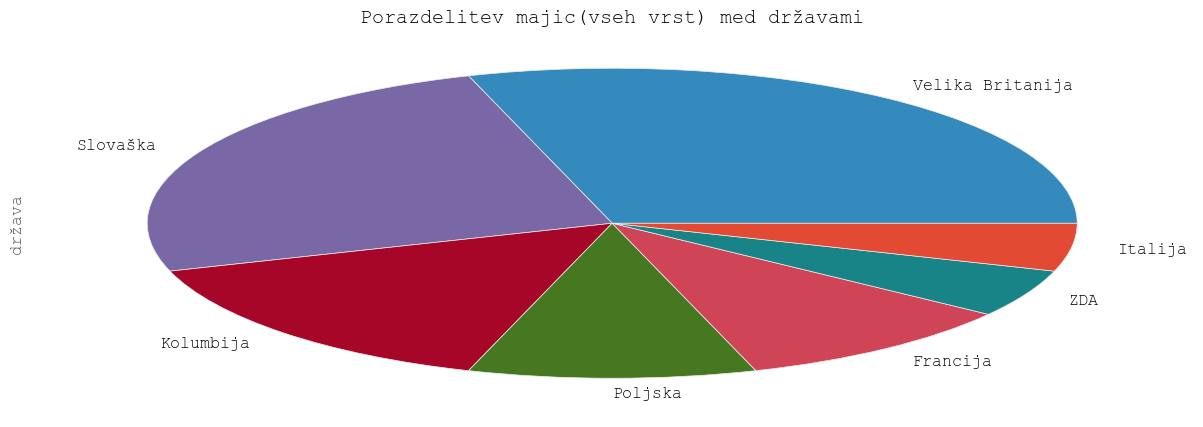

In [52]:
majiced['država'].value_counts().plot(kind='pie', fontsize='12',
                                      title='Porazdelitev majic(vseh vrst) med državami')

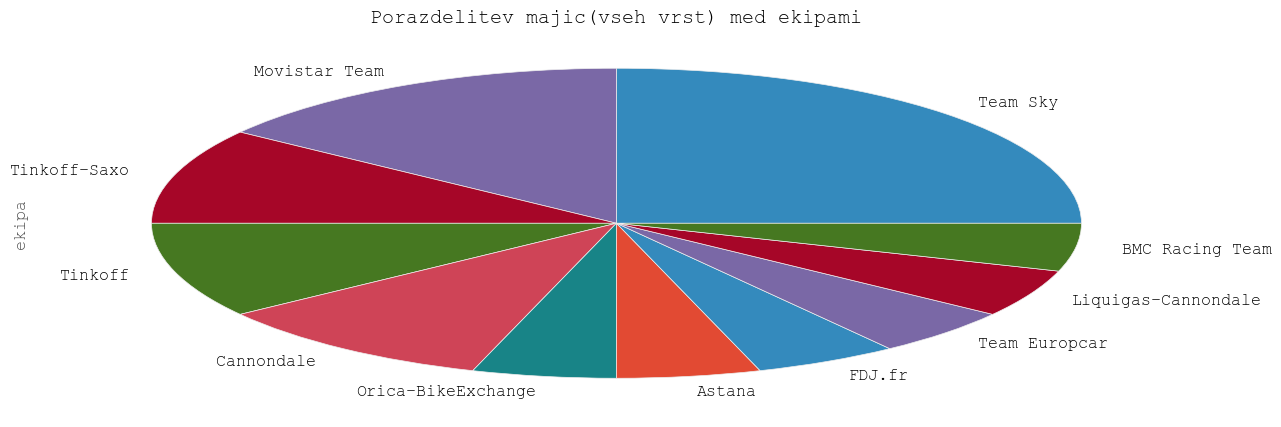

In [53]:
majicee['ekipa'].value_counts().plot(kind='pie', fontsize='12',
                                    title='Porazdelitev majic(vseh vrst) med ekipami')

### Rumena vs. Bela 

In [50]:
naskokb = B[B.mesto == 2][['leto', 'čas']].set_index('leto')
naskokb.columns = ['zaostanek bela']
naskok0 = pd.DataFrame(naskok['čas'])
naskok0.columns = ['zaostanek rumena']
naskok0.join(naskokb)

,zaostanek rumena,zaostanek bela
leto,,
2012,3:21,6:13
2013,4:20,13:19
2014,7:37,3:11
2015,1:12,14:48
2016,4:05,2:16
